### A. Data Acquisition

#### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
sns.set(color_codes=True)

#### 2. Load the dataset

In [2]:
df_faa = pd.read_csv('faa_incidents_data.csv')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_faa

,AIDS Report Number,Local Event Date,Event City,Event State,Event Airport,Event Type,Aircraft Damage,Flight Phase,Aircraft Make,Aircraft Model,...,Aircraft Registration Nbr,Total Fatalities,Total Injuries,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,Nbr of Engines,PIC Certificate Type,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model
0,19780101000019I,1-Jan-78,WAHPETON,ND,BRECKENRIDGE,INCIDENT,MINOR,ROLL-OUT (FIXED WING),CESSNA,182,...,2691Q,0,0,NaN,NaN,NaN,1.0,PRIVATE PILOT,245.0,136.0
1,19780101000029I,1-Jan-78,FAIRBANKS,AK,FAIRBANKS INTL,INCIDENT,MINOR,ROLL-OUT (FIXED WING),PIPER,PA18,...,4073E,0,0,NaN,NaN,NaN,1.0,STUDENT,200.0,2.0
2,19780101000039I,1-Jan-78,BRUNSWICK,GA,JEKYLL ISLAND,INCIDENT,NaN,NORMAL CRUISE,BEECH,35,...,7929D,0,0,NaN,NaN,NaN,1.0,PRIVATE PILOT,NaN,0.0
3,19780101000049I,1-Jan-78,CARLSBAD,CA,MC CLELLAN-PALOMAR,INCIDENT,MINOR,LEVEL OFF TOUCHDOWN,CESSNA,310,...,2250F,0,0,NaN,NaN,NaN,2.0,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0,400.0
4,19780101000059I,1-Jan-78,TROUTDALE,OR,TROUTDALE MUNI,INCIDENT,MINOR,"GROUND TAXI, OTHER AIRPLANE",CESSNA,172,...,738FD,0,0,NaN,NaN,NaN,1.0,COMMERCIAL PILOT,300.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,20151217023139I,17-Dec-15,PHOENIX,AZ,PHOENIX SKY HARBOR INTL,INCIDENT,MINOR,TAKEOFF: CLIMB OUT,RAYTHEON,390,...,929SS,0,0,WILLIA,FJ44-2A,TURBOF,2.0,AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR,NaN,230.0
99996,20151218021509I,18-Dec-15,NaN,NaN,CAMARILLO,INCIDENT,MINOR,LANDING: APPROACH,CESSNA,550,...,363CA,0,0,P&W CA,PW530A,NaN,2.0,UNKNOWN/FOREIGN,5500.0,150.0
99997,20151218021729I,18-Dec-15,BELLEVILLE,MI,WILLOW RUN,INCIDENT,MINOR,MANEUVER,CESSNA,172RG,...,6545V,0,0,LYCOMI,O&VO-360 SER,NaN,1.0,PRIVATE PILOT,267.0,44.0
99998,20151218024079I,18-Dec-15,LEAVENWORTH,KS,SHERMAN AAF,INCIDENT,MINOR,LANDING: TOUCHDOWN,PIPER,PA28,...,8338W,0,0,LYCOMI,O&VO-360 SER,NaN,NaN,STUDENT,18.0,13.0


In [4]:
df_faa.shape

(100000, 25)

<br>

### B. Data Preparation

#### 1. Variables Selection

In [5]:
# Drop the irrelevant features columns
df_faa = df_faa.drop(['AIDS Report Number', 'Event State', 'Event Type', 'Event Airport', 'Aircraft Damage', 'Flight Phase', 'Aircraft Make', 'Aircraft Model', 'Aircraft Series', 'Operator', 'Primary Flight Type', 'Flight Conduct Code', 'Flight Plan Filed Code', 'Aircraft Registration Nbr', 'Aircraft Engine Make', 'Aircraft Engine Model', 'Engine Group Code' , 'Nbr of Engines', 'PIC Flight Time Total Make-Model', 'Event City', 'Total Fatalities', 'Total Injuries'], axis=1)
df_faa

,Local Event Date,PIC Certificate Type,PIC Flight Time Total Hrs
0,1-Jan-78,PRIVATE PILOT,245.0
1,1-Jan-78,STUDENT,200.0
2,1-Jan-78,PRIVATE PILOT,NaN
3,1-Jan-78,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0
4,1-Jan-78,COMMERCIAL PILOT,300.0
...,...,...,...
99995,17-Dec-15,AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR,NaN
99996,18-Dec-15,UNKNOWN/FOREIGN,5500.0
99997,18-Dec-15,PRIVATE PILOT,267.0
99998,18-Dec-15,STUDENT,18.0


In [6]:
df_faa.shape

(100000, 3)

#### 2. Data Cleaning

#### 2.1 Check data information

In [7]:
df_faa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Local Event Date           100000 non-null  object 
 1   PIC Certificate Type       91474 non-null   object 
 2   PIC Flight Time Total Hrs  79807 non-null   float64
dtypes: float64(1), object(2)
memory usage: 2.3+ MB


#### 2.2 Duplicate rows (Redundant)

In [8]:
# Rows containing duplicate data
duplicate_rows_df = df_faa[df_faa.duplicated()]
print("number of duplicate rows:" , duplicate_rows_df.shape)

number of duplicate rows: (7193, 3)


In [9]:
# Used to count the number of rows before removing the data
df_faa.count() 

Local Event Date             100000
PIC Certificate Type          91474
PIC Flight Time Total Hrs     79807
dtype: int64

In [10]:
# Dropping the duplicates 
df_faa = df_faa.drop_duplicates()
df_faa.count()

Local Event Date             92807
PIC Certificate Type         86782
PIC Flight Time Total Hrs    78958
dtype: int64

In [11]:
# Recheck the remaining duplicated data
duplicate_rows_df = df_faa[df_faa.duplicated()]
print("number of duplicate rows:" , duplicate_rows_df.shape)

number of duplicate rows: (0, 3)


In [12]:
# Check the number of rows of each feature
df_faa.count()

Local Event Date             92807
PIC Certificate Type         86782
PIC Flight Time Total Hrs    78958
dtype: int64

#### 2.3 Missing or NaN data values

In [13]:
# Finding the null values in each of the features.
print(df_faa.isnull().sum())

Local Event Date                 0
PIC Certificate Type          6025
PIC Flight Time Total Hrs    13849
dtype: int64


In [14]:
# Dropping the missing values.
df_faa = df_faa.dropna() 

# Recheck the null values after drop the null values before
print(df_faa.isnull().sum()) 

Local Event Date             0
PIC Certificate Type         0
PIC Flight Time Total Hrs    0
dtype: int64


In [15]:
# Count the number of row on each features after remove the missing values
df_faa.count()

Local Event Date             77877
PIC Certificate Type         77877
PIC Flight Time Total Hrs    77877
dtype: int64

In [16]:
df_faa

,Local Event Date,PIC Certificate Type,PIC Flight Time Total Hrs
0,1-Jan-78,PRIVATE PILOT,245.0
1,1-Jan-78,STUDENT,200.0
3,1-Jan-78,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0
4,1-Jan-78,COMMERCIAL PILOT,300.0
7,1-Jan-78,COMMERCIAL PILOT,2700.0
...,...,...,...
99994,17-Dec-15,AIRLINE TRANSPORT,16650.0
99996,18-Dec-15,UNKNOWN/FOREIGN,5500.0
99997,18-Dec-15,PRIVATE PILOT,267.0
99998,18-Dec-15,STUDENT,18.0


#### 2.4 Detecting and removing outliers

<AxesSubplot:xlabel='PIC Flight Time Total Hrs'>

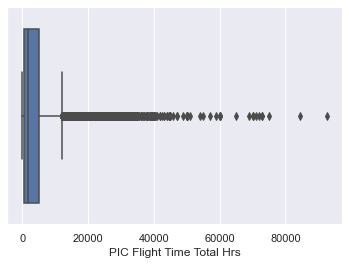

In [17]:
# Detecting outliers using Pilot Flight time feature, the reason why using it because the range of each values is not normal
# and if it not fixed, it will disturb the result

sns.boxplot(x=df_faa['PIC Flight Time Total Hrs'])

In [18]:
# We will detect the outliers using Quantiles method
# Q1 is 1/4 and Q3 is 3/4
Q1 = np.quantile(df_faa['PIC Flight Time Total Hrs'], 0.25)
Q3 = np.quantile(df_faa['PIC Flight Time Total Hrs'], 0.75)
IQR = Q3 - Q1
print(IQR)

4600.0


In [19]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q1 + 1.5*IQR
lower_limit, upper_limit

(-6500.0, 7300.0)

In [20]:
# Get the outliers data
pilotHours = df_faa['PIC Flight Time Total Hrs']
# Print the data which is outliers
dfOutliers = df_faa[(pilotHours < lower_limit) | (pilotHours > upper_limit)]
dfOutliers

,Local Event Date,PIC Certificate Type,PIC Flight Time Total Hrs
51,4-Jan-78,AIRLINE TRANSPORT,14750.0
56,4-Jan-78,COMMERCIAL PILOT,8000.0
58,4-Jan-78,AIRLINE TRANSPORT,8600.0
62,5-Jan-78,AIRLINE TRANSPORT,11955.0
63,5-Jan-78,AIRLINE TRANSPORT,14000.0
...,...,...,...
99967,4-Dec-15,PRIVATE PILOT,20000.0
99968,5-Dec-15,COMMERCIAL PILOT,9000.0
99972,6-Dec-15,AIRLINE TRANSPORT,15050.0
99994,17-Dec-15,AIRLINE TRANSPORT,16650.0


In [21]:
# Count the shape of outliers
print(dfOutliers.shape)

(13608, 3)


<p>We can see the information that we have 12.546 rows which are outliers, now we can select the way to fix it, whether fix the value or remove it. I would rather remove it than fix the value.</p>

In [22]:
# Remove the outliers
df_faa_no_outliers = df_faa[(pilotHours > lower_limit) & (pilotHours < upper_limit)]
df_faa_no_outliers = df_faa_no_outliers.reset_index()

df_faa_no_outliers = df_faa_no_outliers.drop(['index'], axis=1)
df_faa_no_outliers

,Local Event Date,PIC Certificate Type,PIC Flight Time Total Hrs
0,1-Jan-78,PRIVATE PILOT,245.0
1,1-Jan-78,STUDENT,200.0
2,1-Jan-78,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0
3,1-Jan-78,COMMERCIAL PILOT,300.0
4,1-Jan-78,COMMERCIAL PILOT,2700.0
...,...,...,...
64200,14-Dec-15,PRIVATE PILOT,935.0
64201,15-Dec-15,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2200.0
64202,18-Dec-15,UNKNOWN/FOREIGN,5500.0
64203,18-Dec-15,PRIVATE PILOT,267.0


<br>

#### 3. Data Transformation

#### 3.1 Add Year Columns

In [23]:
# Add column Year based on Local Event Date Column
df_faa_no_outliers['Year'] = pd.DatetimeIndex(df_faa_no_outliers.loc[:, 'Local Event Date']).year
df_faa_no_outliers

,Local Event Date,PIC Certificate Type,PIC Flight Time Total Hrs,Year
0,1-Jan-78,PRIVATE PILOT,245.0,1978
1,1-Jan-78,STUDENT,200.0,1978
2,1-Jan-78,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0,1978
3,1-Jan-78,COMMERCIAL PILOT,300.0,1978
4,1-Jan-78,COMMERCIAL PILOT,2700.0,1978
...,...,...,...,...
64200,14-Dec-15,PRIVATE PILOT,935.0,2015
64201,15-Dec-15,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2200.0,2015
64202,18-Dec-15,UNKNOWN/FOREIGN,5500.0,2015
64203,18-Dec-15,PRIVATE PILOT,267.0,2015


<br>

#### 3.2 Get rid of categorical values

#### 3.2.1 Get the unique value from PIC Certificate Type

In [24]:
certificate = df_faa_no_outliers['PIC Certificate Type']
unknown_1 = df_faa_no_outliers[(certificate == 'UNKNOWN/FOREIGN') | (certificate == 'AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR')].index
unknown_2 = df_faa_no_outliers[(certificate == 'COMMERCIAL PILOT FLIGHT INSTRUCTOR') | (certificate == 'PRIVATE PILOT FLIGHT INSTRUCTOR')].index
#print(unknown)

# drop these given row
df_faa_no_outliers.drop(unknown_1, inplace = True)
df_faa_no_outliers.drop(unknown_2, inplace = True)


# Reset the index value
df_faa_no_outliers = df_faa_no_outliers.reset_index()
df_faa_no_outliers = df_faa_no_outliers.drop(['index'], axis=1)
df_faa_no_outliers

,Local Event Date,PIC Certificate Type,PIC Flight Time Total Hrs,Year
0,1-Jan-78,PRIVATE PILOT,245.0,1978
1,1-Jan-78,STUDENT,200.0,1978
2,1-Jan-78,COMMERCIAL PILOT,300.0,1978
3,1-Jan-78,COMMERCIAL PILOT,2700.0,1978
4,1-Jan-78,PRIVATE PILOT,450.0,1978
...,...,...,...,...
55163,12-Dec-15,COMMERCIAL PILOT,960.0,2015
55164,13-Dec-15,PRIVATE PILOT,2398.0,2015
55165,14-Dec-15,PRIVATE PILOT,935.0,2015
55166,18-Dec-15,PRIVATE PILOT,267.0,2015


#### 3.2.2 Visualize the unique values from PIC Certifiate Type

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


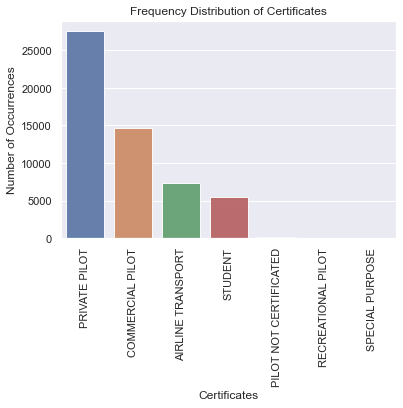

In [26]:
certificate_count = df_faa_no_outliers['PIC Certificate Type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(certificate_count.index, certificate_count.values, alpha=0.9)
plt.title('Frequency Distribution of Certificates')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Certificates', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [27]:
certificate_count = df_faa_no_outliers['PIC Certificate Type'].value_counts()
print(certificate_count.index)

Index(['PRIVATE PILOT', 'COMMERCIAL PILOT', 'AIRLINE TRANSPORT', 'STUDENT',
       'PILOT NOT CERTIFICATED', 'RECREATIONAL PILOT', 'SPECIAL PURPOSE'],
      dtype='object')


#### 3.2.4 Encoding PIC Certificate Type using LabelEncoder

In [28]:
# Import the appropriate Library
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder = LabelEncoder()
encoded_cert = encoder.fit_transform(df_faa_no_outliers.loc[:, 'PIC Certificate Type'])
print(encoded_cert)

[3 6 1 ... 3 3 6]


In [30]:
# Replace the current PIC Certificate Type columns with the encoded values
df_faa_no_outliers['PIC Certificate Type'] = encoded_cert

In [31]:
# Visualize the new dataframe
df_faa_no_outliers

,Local Event Date,PIC Certificate Type,PIC Flight Time Total Hrs,Year
0,1-Jan-78,3,245.0,1978
1,1-Jan-78,6,200.0,1978
2,1-Jan-78,1,300.0,1978
3,1-Jan-78,1,2700.0,1978
4,1-Jan-78,3,450.0,1978
...,...,...,...,...
55163,12-Dec-15,1,960.0,2015
55164,13-Dec-15,3,2398.0,2015
55165,14-Dec-15,3,935.0,2015
55166,18-Dec-15,3,267.0,2015


#### 3.2.5 Visualize the encoded values

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


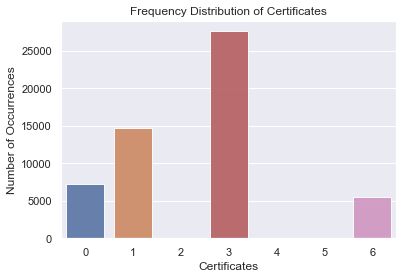

In [33]:
certificate_count = df_faa_no_outliers['PIC Certificate Type'].value_counts()
#certificate_count.sort_values(certificate_count.values, ascending=True)
sns.set(style="darkgrid")
sns.barplot(certificate_count.index, certificate_count.values, alpha=0.9)
plt.title('Frequency Distribution of Certificates')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Certificates', fontsize=12)
plt.show()

In [34]:
df_faa_no_outliers.shape

(55168, 4)

<br>

#### 4. Data Reduction

#### 4.1 Remove data < 2010

In [35]:
# Delete rows based on column condition
old_years = df_faa_no_outliers[ (df_faa_no_outliers['Year']) < 2010 ].index
# print(old_years)

# drop these given row
df_faa_no_outliers.drop(old_years, inplace = True)

# Reset the index value
df_faa_no_outliers = df_faa_no_outliers.reset_index()
df_faa_no_outliers = df_faa_no_outliers.drop(['index'], axis=1)

In [36]:
df_faa_no_outliers

,Local Event Date,PIC Certificate Type,PIC Flight Time Total Hrs,Year
0,1-Jan-10,1,0.0,2010
1,2-Jan-10,3,430.0,2010
2,3-Jan-10,3,1294.0,2010
3,3-Jan-10,1,1500.0,2010
4,5-Jan-10,1,280.0,2010
...,...,...,...,...
3731,12-Dec-15,1,960.0,2015
3732,13-Dec-15,3,2398.0,2015
3733,14-Dec-15,3,935.0,2015
3734,18-Dec-15,3,267.0,2015


In [37]:
df_faa_no_outliers.shape

(3736, 4)

<br>

#### 4.2 Principal Component Analysis (PCA)

In [38]:
df_faa_clustering = df_faa_no_outliers.copy()

In [39]:
df_faa_clustering = df_faa_clustering.drop(['Local Event Date', 'Year'], axis=1)
df_faa_clustering.head()

,PIC Certificate Type,PIC Flight Time Total Hrs
0,1,0.0
1,3,430.0
2,3,1294.0
3,1,1500.0
4,1,280.0


In [40]:
df_faa_clustering.head(10)

,PIC Certificate Type,PIC Flight Time Total Hrs
0,1,0.0
1,3,430.0
2,3,1294.0
3,1,1500.0
4,1,280.0
5,1,1944.0
6,3,1600.0
7,0,0.0
8,1,1870.0
9,1,336.0


In [41]:
from sklearn import preprocessing

In [42]:
scaler = preprocessing.StandardScaler()

In [43]:
standardScaler_df = scaler.fit_transform(df_faa_clustering)
print(standardScaler_df)

[[-1.07845056 -0.88734671]
 [ 0.24734453 -0.6379143 ]
 [ 0.24734453 -0.13672917]
 ...
 [ 0.24734453 -0.34497623]
 [ 0.24734453 -0.73246659]
 [ 2.23603717 -0.87690536]]


In [44]:
scaler_df = pd.DataFrame(data = standardScaler_df, columns= ['PIC Certificate Type', 'PIC Flight Time Total Hrs'])
scaler_df.head()

,PIC Certificate Type,PIC Flight Time Total Hrs
0,-1.078451,-0.887347
1,0.247345,-0.637914
2,0.247345,-0.136729
3,-1.078451,-0.017234
4,-1.078451,-0.724926


In [45]:
scaler_df.head(10)

,PIC Certificate Type,PIC Flight Time Total Hrs
0,-1.078451,-0.887347
1,0.247345,-0.637914
2,0.247345,-0.136729
3,-1.078451,-0.017234
4,-1.078451,-0.724926
5,-1.078451,0.240320
6,0.247345,0.040774
7,-1.741348,-0.887347
8,-1.078451,0.197394
9,-1.078451,-0.692441


In [46]:
from sklearn.decomposition import PCA

In [47]:
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(standardScaler_df)

In [48]:
reduced_data.shape

(3736, 2)

In [49]:
cluster_df = pd.DataFrame(data = reduced_data, columns= ['PIC Certificate Type', 'PIC Flight Time Total Hrs'])
cluster_df.head(10)

,PIC Certificate Type,PIC Flight Time Total Hrs
0,0.135131,-1.390029
1,-0.625973,-0.276175
2,-0.271581,0.078217
3,0.750394,-0.774766
4,0.249980,-1.275180
5,0.932511,-0.592648
6,-0.146067,0.203730
7,0.603870,-1.858768
8,0.902159,-0.623001
9,0.272950,-1.252210


<br>

### C. Clustering

In [50]:
from sklearn.cluster import KMeans

In [51]:
km = KMeans(n_clusters=4)

In [52]:
cluster = km.fit(reduced_data)

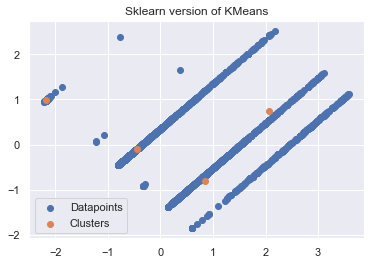

In [53]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [54]:
centers = km.cluster_centers_
print(centers)

[[-0.45137274 -0.10289452]
 [ 2.07014326  0.74173865]
 [-2.18064887  0.98158522]
 [ 0.84087926 -0.81544432]]


In [55]:
new_labels = km.labels_
print (new_labels)

[3 0 0 ... 0 0 2]


Text(0.5, 1.0, 'Predicted')

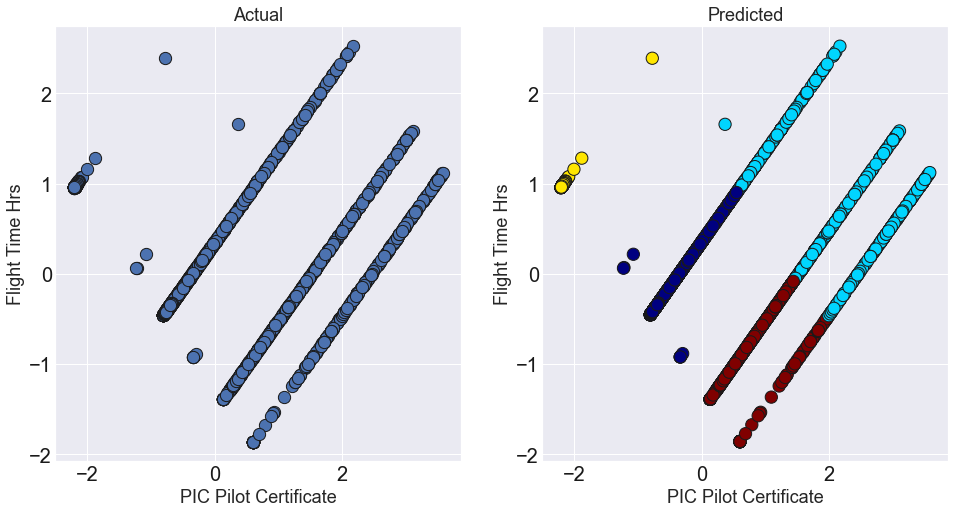

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(reduced_data[:, 0], reduced_data[:, 1], c='b', cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(reduced_data[:, 0], reduced_data[:, 1], c=new_labels, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('PIC Pilot Certificate', fontsize=18)
axes[0].set_ylabel('Flight Time Hrs', fontsize=18)
axes[1].set_xlabel('PIC Pilot Certificate', fontsize=18)
axes[1].set_ylabel('Flight Time Hrs', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [57]:
from kmeans_numpy_improved import *

In [58]:
km_numpy = KMeans_numpy(n_clusters=4, tolerance=0.0001)

In [59]:
clusters, clusterd_data = km_numpy.fit(reduced_data)
clusters = np.array(clusters)

In [60]:
cluster_one_data = np.array(clusterd_data[0])
cluster_two_data = np.array(clusterd_data[1])
cluster_three_data = np.array(clusterd_data[2])
cluster_four_data = np.array(clusterd_data[3])

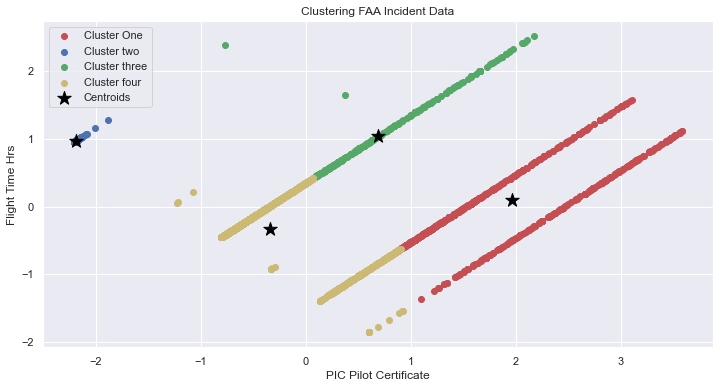

In [61]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data[:, 0], cluster_one_data[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data[:, 0], cluster_two_data[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data[:, 0], cluster_three_data[:, 1], c='g', label='Cluster three')
plt.scatter(cluster_four_data[:, 0], cluster_four_data[:, 1], c='y', label='Cluster four')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.title("Clustering FAA Incident Data")
plt.xlabel('PIC Pilot Certificate')
plt.ylabel('Flight Time Hrs')
plt.legend()
plt.show()

## Analyse clusters

In [62]:
full_data_kmeans = KMeans_numpy(n_clusters=4)
centroids, clus_data = full_data_kmeans.fit(df_faa_clustering.values)

In [63]:
cluster_1 = pd.DataFrame(clus_data[0], columns=['PIC Certificate Type', 'PIC Flight Time Total Hrs'])
cluster_2 = pd.DataFrame(clus_data[1], columns=['PIC Certificate Type', 'PIC Flight Time Total Hrs'])
cluster_3 = pd.DataFrame(clus_data[2], columns=['PIC Certificate Type', 'PIC Flight Time Total Hrs'])
cluster_4 = pd.DataFrame(clus_data[3], columns=['PIC Certificate Type', 'PIC Flight Time Total Hrs'])

<br>

### Analysis the relation between Pilot flight certification and Pilot Flight time Hrs against the number of aircraft incident

<p style="text-align: justify; line-height: 2.0">Based on FAA provisions, there are flight times standard that the pilots need to fulfill to get the flight certification.
<br>
1. To get the "Private Pilot" certificate, a pilot takes at least 40 Hrs Flight times. 
<br>
2. Then to get "Commercial Pilot" certificate, a pilot takes at least 250 Hrs Flight times. 
<br>
3. For "Airline Transport" flight certification, a pilot takes at least 1500 Hrs Flight times. 
<br>
4. Then for "Recreational Pilot" flight certification, a pilot takes at least 30 Hrs Flight times.
<br>
We will analyze each cluster which have many pilots who not meet the flight time standard for each of the flight certification. we assumed that the more pilot who not meet the flight time requirement, the more aircraft incidents happened
<br>
In this data, we have :
<br>
0. AIRLINE TRANSPORT [0] : 281
<br>
1. COMMERCIAL PILOT [1] : 813
<br>
2. PILOT NOT CERTIFICATED [2] : 6
    <br>
3. PRIVATE PILOT [3] : 2273
    <br>
4. RECREATIONAL PILOT [4] : 4
    <br>
5. SPECIAL PURPOSE [5] : 0
    <br>
6. STUDENT [6] : 359
</p>

### Cluster 1 Analysis

In [64]:
cluster_1

,PIC Certificate Type,PIC Flight Time Total Hrs
0,1.0,5000.0
1,0.0,4800.0
2,1.0,5500.0
3,0.0,6586.0
4,0.0,7000.0
...,...,...
334,0.0,6229.0
335,1.0,7000.0
336,0.0,6200.0
337,1.0,5535.0


In [91]:
# we will check what kind of pilot flight certification contribute in aircraft accident on cluster 1
print("Average PIC Flight Time Total Hrs for pilot in cluster one: {}".format(np.array(cluster_1['PIC Flight Time Total Hrs']).mean()))
print("In cluster one we have: {} type of certificate".format(cluster_1['PIC Certificate Type'].value_counts()))

Average PIC Flight Time Total Hrs for pilot in cluster one: 5722.221238938053
In cluster one we have: 0.0    136
1.0    120
3.0     83
Name: PIC Certificate Type, dtype: int64 type of certificate


<p style="line-height: 2.0">So we have :
<br>
1. 136 incident cases with AIRLINE TRANSPORT certified pilot
<br>
2. 120 incident cases with COMMERCIAL PILOT certified pilot
<br>
3. 83 incident cases with PRIVATE PILOT certified pilot
<br>
After that, we will check how many pilot who not meet the FAA standard flight times</p>

In [88]:
# Check how many pilot who not meet the standard flight times for Airline Transport certification
airlineTransport = cluster_1[(cluster_1['PIC Certificate Type']) == 0.0]
a_t_minus = airlineTransport[(airlineTransport['PIC Flight Time Total Hrs']) < 1500]
a_t_minus

,PIC Certificate Type,PIC Flight Time Total Hrs


In [89]:
# Check how many pilot who not meet the standard flight times for Commercial Pilot certification
commercialPilot = cluster_1[(cluster_1['PIC Certificate Type']) == 1.0]
commercialPilot.shape
c_p_minus = commercialPilot[(commercialPilot['PIC Flight Time Total Hrs']) < 250]
c_p_minus

,PIC Certificate Type,PIC Flight Time Total Hrs


In [90]:
# Check how many pilot who not meet the standard flight times for Commercial Pilot certification
privatePilot = cluster_1[(cluster_1['PIC Certificate Type']) == 3.0]
privatePilot.shape
p_p_minus = privatePilot[(privatePilot['PIC Flight Time Total Hrs']) < 40]
p_p_minus

,PIC Certificate Type,PIC Flight Time Total Hrs


<p style="line-height: 2.0; text-align: justify;">we can see that in cluster 1, there is no pilot who not meet the FAA standard flight time requirement. And there are 339 aircraft incident cases in cluster 1 with average pilot flight times  : 5722.221238938053 Hours</p>

<br>

### Cluster 2 Analysis

In [69]:
cluster_2

,PIC Certificate Type,PIC Flight Time Total Hrs
0,1.0,2790.0
1,0.0,3000.0
2,1.0,2522.0
3,1.0,3600.0
4,1.0,4000.0
...,...,...
542,1.0,2500.0
543,3.0,2600.0
544,1.0,2800.0
545,0.0,4172.0


In [70]:
print("Average PIC Flight Time Total Hrs for pilot in cluster two: {}".format(np.array(cluster_2['PIC Flight Time Total Hrs']).mean()))
print("In cluster two we have: {} type of certificate".format(cluster_2['PIC Certificate Type'].value_counts()))

Average PIC Flight Time Total Hrs for pilot in cluster two: 3242.151736745887
In cluster two we have: 1.0    241
3.0    214
0.0     90
4.0      1
6.0      1
Name: PIC Certificate Type, dtype: int64 type of certificate


<p style="line-height: 2.0">So we have :
<br>
1. 90 incident cases with AIRLINE TRANSPORT certified pilot
<br>
2. 241 incident cases with COMMERCIAL PILOT certified pilot
<br>
3. 214 incident cases with PRIVATE PILOT certified pilot
<br>
4. 1 incident case with STUDENT certified pilot
<br>
5. 1 incident case with RECREATIONAL PILOT certified pilot
<br>
After that, we will check how many pilot who not meet the FAA standard flight times</p>

In [92]:
# Check how many pilot who not meet the standard flight times for Airline Transport certification
airlineTransport = cluster_2[(cluster_2['PIC Certificate Type']) == 0.0]
a_t_minus = airlineTransport[(airlineTransport['PIC Flight Time Total Hrs']) < 1500]
a_t_minus

,PIC Certificate Type,PIC Flight Time Total Hrs


In [93]:
# Check how many pilot who not meet the standard flight times for Commercial Pilot certification
commercialPilot = cluster_2[(cluster_2['PIC Certificate Type']) == 1.0]
c_p_minus = commercialPilot[(commercialPilot['PIC Flight Time Total Hrs']) < 250]
c_p_minus

,PIC Certificate Type,PIC Flight Time Total Hrs


In [94]:
# Check how many pilot who not meet the standard flight times for Private Pilot certification
privatePilot = cluster_2[(cluster_2['PIC Certificate Type']) == 3.0]
p_p_minus = privatePilot[(privatePilot['PIC Flight Time Total Hrs']) < 40]
p_p_minus

,PIC Certificate Type,PIC Flight Time Total Hrs


In [110]:
# Check how many pilot who not meet the standard flight times for Recreational Pilot certification
recreationalPilot = cluster_2[(cluster_2['PIC Certificate Type']) == 4.0]
r_p_minus = recreationalPilot[(recreationalPilot['PIC Flight Time Total Hrs']) < 30]
r_p_minus

,PIC Certificate Type,PIC Flight Time Total Hrs


<p style="line-height: 2.0; text-align: justify;">Since FAA does not specify the flight times standard for Student Certification, then we dont need to analyze the flight times. Then we can see that in cluster 2, there is no pilot who not meet the FAA standard flight time requirement. And there are 547 aircraft incident cases in cluster 2 with average pilot flight times  : 3242.151736745887 Hours</p>

<br>

### Cluster 3 Analysis

In [74]:
cluster_3

,PIC Certificate Type,PIC Flight Time Total Hrs
0,3.0,1294.0
1,1.0,1500.0
2,1.0,1944.0
3,3.0,1600.0
4,1.0,1870.0
...,...,...
916,3.0,1628.0
917,3.0,1903.0
918,3.0,1474.0
919,1.0,960.0


In [96]:
print("Average PIC Flight Time Total Hrs for pilot in cluster three: {}".format(np.array(cluster_3['PIC Flight Time Total Hrs']).mean()))
print("In cluster three we have: {} type of certificate".format(cluster_3['PIC Certificate Type'].value_counts()))

Average PIC Flight Time Total Hrs for pilot in cluster three: 1514.5385450597178
In cluster three we have: 3.0    615
1.0    287
0.0     19
Name: PIC Certificate Type, dtype: int64 type of certificate


<p style="line-height: 2.0">So we have :
<br>
1. 19 incident cases with AIRLINE TRANSPORT certified pilot
<br>
2. 287 incident cases with COMMERCIAL PILOT certified pilot
<br>
3. 615 incident cases with PRIVATE PILOT certified pilot
<br>
After that, we will check how many pilot who not meet the FAA standard flight times</p>

In [99]:
# Check how many pilot who not meet the standard flight times for Airline Transport certification
airlineTransport = cluster_3[(cluster_3['PIC Certificate Type']) == 0.0]
a_t_minus = airlineTransport[(airlineTransport['PIC Flight Time Total Hrs']) < 1500]
a_t_minus

,PIC Certificate Type,PIC Flight Time Total Hrs
92,0.0,1200.0


In [98]:
# Check how many pilot who not meet the standard flight times for Commercial Pilot certification
commercialPilot = cluster_3[(cluster_3['PIC Certificate Type']) == 1.0]
c_p_minus = commercialPilot[(commercialPilot['PIC Flight Time Total Hrs']) < 250]
c_p_minus

,PIC Certificate Type,PIC Flight Time Total Hrs


In [100]:
# Check how many pilot who not meet the standard flight times for Private Pilot certification
privatePilot = cluster_3[(cluster_3['PIC Certificate Type']) == 3.0]
p_p_minus = privatePilot[(privatePilot['PIC Flight Time Total Hrs']) < 40]
p_p_minus

,PIC Certificate Type,PIC Flight Time Total Hrs


<p style="line-height: 2.0; text-align: justify;">We can see that in cluster 3, there is 1 pilot who not meet the FAA standard flight time requirement with AIRLINE TRANSPORT certified pilot. And there are 921 aircraft incident cases in cluster 3 with average pilot flight times  : 1514.5385450597178 Hours</p>

<br>

### Cluster 4 Analysis

In [101]:
cluster_4

,PIC Certificate Type,PIC Flight Time Total Hrs
0,1.0,0.0
1,3.0,430.0
2,1.0,280.0
3,0.0,0.0
4,1.0,336.0
...,...,...
1924,3.0,258.0
1925,3.0,285.0
1926,3.0,80.0
1927,3.0,267.0


In [102]:
print("Average PIC Flight Time Total Hrs for pilot in cluster four: {}".format(np.array(cluster_4['PIC Flight Time Total Hrs']).mean()))
print("In cluster four we have: {} type of certificate".format(cluster_4['PIC Certificate Type'].value_counts()))

Average PIC Flight Time Total Hrs for pilot in cluster four: 314.57439087610163
In cluster four we have: 3.0    1361
6.0     358
1.0     165
0.0      36
2.0       6
4.0       3
Name: PIC Certificate Type, dtype: int64 type of certificate


<p style="line-height: 2.0">So we have :
<br>
1. 36 incident cases with AIRLINE TRANSPORT certified pilot
<br>
2. 165 incident cases with COMMERCIAL PILOT certified pilot
<br>
3. 6 incident cases with pilot who does not have any flight certification
<br>
4. 1361 incident cases with PRIVATE PILOT certified pilot
<br>
5. 3 incident case with RECREATIONAL PILOT certified pilot
<br>
6. 358 incident case with STUDENT certified pilot
<br>
After that, we will check how many pilot who not meet the FAA standard flight times</p>

In [115]:
# Check how many pilot who not meet the standard flight times for Airline Transport certification
airlineTransport = cluster_4[(cluster_4['PIC Certificate Type']) == 0.0]
a_t_minus = airlineTransport[(airlineTransport['PIC Flight Time Total Hrs']) < 1500]
a_t_minus.shape

(36, 2)

In [114]:
# Check how many pilot who not meet the standard flight times for Commercial Pilot certification
commercialPilot = cluster_4[(cluster_4['PIC Certificate Type']) == 1.0]
c_p_minus = commercialPilot[(commercialPilot['PIC Flight Time Total Hrs']) < 250]
c_p_minus.shape

(29, 2)

In [113]:
# Check how many pilot who not meet the standard flight times for Private Pilot certification
privatePilot = cluster_4[(cluster_4['PIC Certificate Type']) == 3.0]
p_p_minus = privatePilot[(privatePilot['PIC Flight Time Total Hrs']) < 40]
p_p_minus.shape

(49, 2)

In [112]:
# Check how many pilot who not meet the standard flight times for Recreational Pilot certification
recreationalPilot = cluster_4[(cluster_4['PIC Certificate Type']) == 4.0]
r_p_minus = recreationalPilot[(recreationalPilot['PIC Flight Time Total Hrs']) < 30]
r_p_minus

,PIC Certificate Type,PIC Flight Time Total Hrs


<p style="line-height:2.0; text-align: justify">As you can see, cluster with the most incident cases, and also with the fewest pilot average flight times is cluster 4. We also can count that there are total 114 pilots who not meet the FAA standard flight times for any certification, and it has 6 incident cases with PILOT NOT CERTIFICATED certified pilot, also have 358 incident cases with STUDENT certified pilot. Pilot who still student or uncertified have minimal flight experience, which result in an increasing number of aircraft accidents.</p>

## Conclusion

<p style="line-height:2.0; text-align: justify">From the analysis below, we can conclude that there is a relation between Pilot flight certification and Pilot flight time hours against the number of aircraft incidents. Because pilot with a minimal number of flight time have lack of experience, which result in an increasing number of aircraft incidents, as we can see in cluster 4 with the fewest pilot average flight time, it have the most incident cases. Then the more pilot who not meet the FAA standard flight times for each of the flight certification, the more aircraft incidents happened.</p>